In [18]:
#IMPORACIONES
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv('hr_data_clean.csv', index_col=0)

In [38]:
df.head(6)

,attrition,businesstravel,dailyrate($),department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate($),jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome($),monthlyrate($),numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome($),datebirth,salary($),roledepartament,numberchildren,remotework,edad_temp
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51,no,unknown,2015.722222,unknown,6,3,unknown,1,1,1,0,251.965278,3,5,research director,3,unknown,16280.830000,42330.17,7,True,no,13,3,3,full time,0,NaN,5,3,20,NaN,15,15,16280.830000,1970-01-01 00:00:00.000001972,195370.00,unknown,NaN,True,55
52,no,unknown,2063.388889,unknown,1,4,life sciences,1,2,3,0,257.923611,2,5,manager,3,unknown,16665.833333,43331.17,0,True,unknown,14,3,1,unknown,1,34.0,5,3,33,NaN,11,9,16665.833333,1970-01-01 00:00:00.000001971,199990.00,unknown,NaN,True,55
42,no,travel rarely,1984.253968,research & development,4,2,technical degree,1,3,3,0,248.031746,3,5,manager,4,married,16026.666667,41669.33,1,True,no,11,3,4,unknown,0,22.0,3,3,22,NaN,11,15,16026.666667,1970-01-01 00:00:00.000001981,192320.00,manager research & development,NaN,True,55
47,no,travel rarely,1771.404762,unknown,2,4,medical,1,4,1,1,221.425595,3,4,research director,3,married,14307.500000,37199.50,3,True,unknown,19,3,2,full time,2,NaN,2,3,20,NaN,5,6,14307.500000,1970-01-01 00:00:00.000001976,171690.00,unknown,NaN,False,55
46,no,unknown,1582.771346,unknown,3,3,technical degree,1,5,1,1,197.846418,4,4,sales executive,1,divorced,12783.920000,33238.20,2,True,no,12,3,4,unknown,1,NaN,5,3,19,NaN,2,8,12783.920000,1970-01-01 00:00:00.000001977,153407.04,unknown,NaN,False,55
48,no,unknown,1771.920635,research & development,22,3,medical,1,6,4,1,221.490079,3,4,manager,4,unknown,14311.670000,37210.33,3,True,no,11,3,2,unknown,1,NaN,3,3,22,NaN,4,7,14311.670000,1970-01-01 00:00:00.000001975,171740.04,manager research & development,NaN,True,55


5. ¿Cómo afecta la responsabilidad de conciliación familiar (cuidado de niños o personas mayores/dependientes) a la satisfacción laboral, la productividad y la permanencia de los empleados en una empresa tech?

consideramos esta cuestión clave para la vida laboral moderna. Sería un punto a tratar por parte de la empresa el diseño de políticas de soporte y beneficios a la conciliación. La ausencia de datos en "numberchildren" no impide abrir esta hipótesis.

In [21]:
df["numberchildren"].unique() #TODOS LOS VALORES SON NULOS, POR LO QUE ESTA HIPÓTESIS QUEDA ABIERTA.

array([nan])

6. ¿De qué manera la frecuencia de viajes laborales, impacta en la economía personal del empleado y su nivel de satisfacción general con la vida personal y laboral?

Comenzamos planteandonos cuantos empleados hay para cada nivel de viejes:

In [22]:
df["businesstravel"].unique()

array(['unknown', 'travel rarely', 'travel frequently', 'non travel'],
      dtype=object)

In [23]:
df_viajes = df.groupby("businesstravel")["employeenumber"].count().reset_index()
df_viajes #OBSERVAMOS Nº DE EMPLEADOS POR CATEGORÍA

,businesstravel,employeenumber
0,non travel,93
1,travel frequently,168
2,travel rarely,616
3,unknown,801


columnas a analizar:

1. Frecuencia Viajes
2. Economía Personal: compensación por los trastornos que ocasionan los viajes laborales
3. Satisfacción Laboral: ¿el viaje mejora o deteriora la expaeriencia laboral?
4. Satisfacción Personal: ¿los viajes tienen un costo en la vida personal del empleado?

In [24]:
df[["businesstravel", "monthlyincome($)", "jobsatisfaction", "worklifebalance"]].head(4) #VALORACIÓN POR RANGO[1:4]

,businesstravel,monthlyincome($),jobsatisfaction,worklifebalance
age,,,,
51,unknown,16280.830000,3,3
52,unknown,16665.833333,3,3
42,travel rarely,16026.666667,4,3
47,travel rarely,14307.500000,3,3


In [25]:
df[["monthlyincome($)", "jobsatisfaction", "worklifebalance"]].describe().T

,count,mean,std,min,25%,50%,75%,max
monthlyincome($),1678.0,5607.833229,5601.610140,909.166667,2342.594167,4492.84,7985.835,94083.0
jobsatisfaction,1678.0,2.743147,1.105172,1.000000,2.000000,3.00,4.000,4.0
worklifebalance,1678.0,2.775924,0.681884,1.000000,2.000000,3.00,3.000,4.0


2. Economía personal:

In [26]:
viajes_vs_economia = df.groupby("businesstravel")["monthlyincome($)"].median().sort_values(ascending=False).reset_index()
print(f'mediana de Ingreso Mensual por frecuencia de viajes:')

viajes_vs_economia

mediana de Ingreso Mensual por frecuencia de viajes:


,businesstravel,monthlyincome($)
0,non travel,4492.840
1,travel rarely,4492.840
2,unknown,4492.840
3,travel frequently,4463.505


NOTA: a la hora de tratar las columnas "jobsatisfaction", "worklifebalance", "relationshipsatisfaction", debemos tener en cuenta que se mueven en un rango de [1:4], por lo que representan una escala ordinal o casi categórica. con countplor obtendremos una distribución de las opiniones y con barplot comparamos las proporciones en cada nivel.

creamos subplots para tener todas las opciones unificadas:

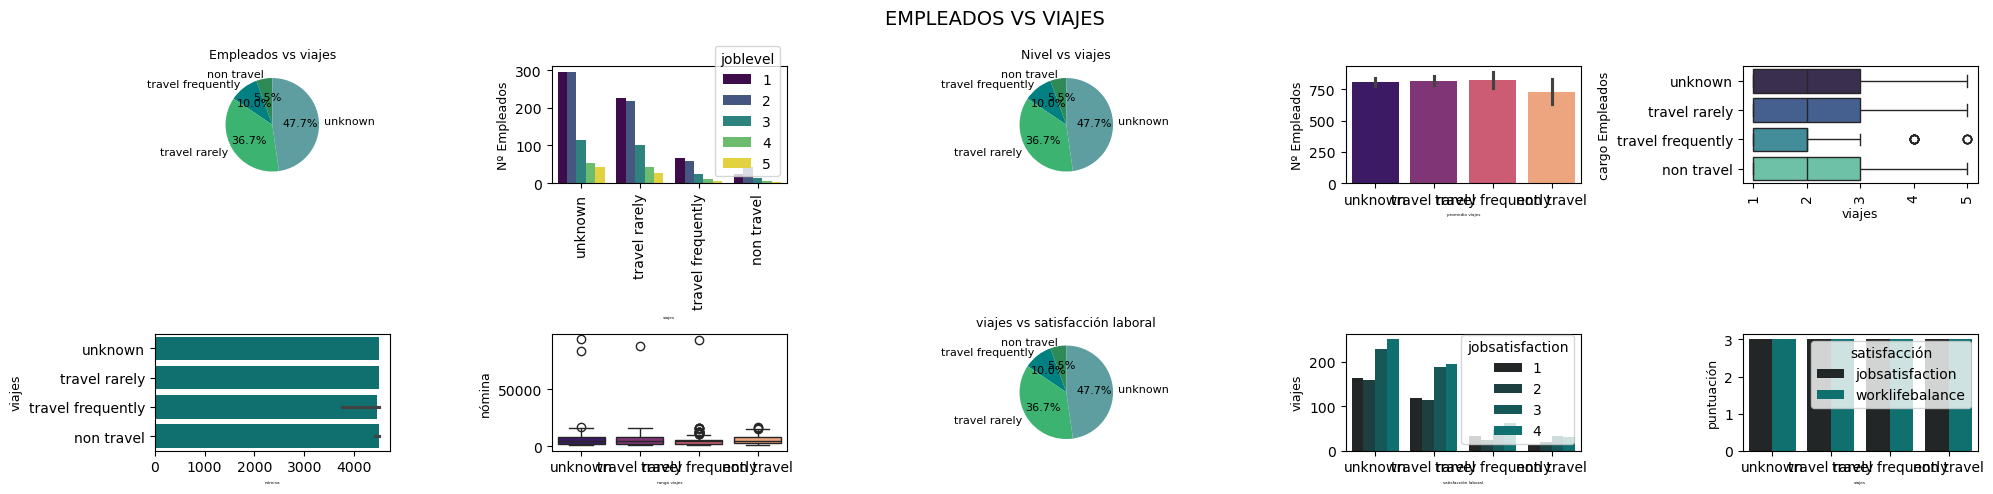

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (20,5)) #FILAS Y COLUMNAS QUE QUEREMOS

axes = axes.flatten() # ERROR EN EJES, APLANAMOS MATRIZ INDEX[0:9]

colores = ["seagreen", "teal", "mediumseagreen", "cadetblue"] #COLORES POR CATEGORÍA
 
axes[0].pie("employeenumber", labels= "businesstravel", #axes[]:INDICAMOS SUBPLOTS
        data = df_viajes, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90)

axes[0].set_title("Empleados vs viajes", fontsize = 9); #TÍTULO 

sns.countplot(x = "businesstravel", 
              data = df, 
              ax = axes[1],
              hue="joblevel", 
              palette = "viridis")

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel("viajes", fontsize = 3)
axes[1].set_ylabel("Nº Empleados",  fontsize = 9); 

axes[2].pie(data=df.groupby("businesstravel")["joblevel"].count().reset_index(), 
            x="joblevel", 
            labels="businesstravel", 
            autopct=  '%1.1f%%',
            colors = colores, 
            textprops={'fontsize': 8}, 
            startangle=90)

axes[2].set_title("Nivel vs viajes", fontsize = 9); #TÍTULO 

sns.barplot(x = "businesstravel", #PROMEDIO DE EMPLEADOS EN CADA CATEGORÍA
            y = "employeenumber", 
            data = df, 
            ax = axes[3], 
            palette = "magma")

axes[3].set_xlabel("promedio viajes", fontsize = 3)
axes[3].set_ylabel("Nº Empleados",  fontsize = 9)

sns.boxplot(x = "joblevel",
            y = "businesstravel", 
            data = df, 
            ax = axes[4], 
            palette= "mako")

axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=90)
axes[4].set_xlabel("viajes", fontsize = 9)
axes[4].set_ylabel("cargo Empleados",  fontsize = 9); 

sns.barplot(x = "monthlyincome($)", 
            y =  "businesstravel", 
            data = df,
            ax = axes[5],
            color = "teal",
            estimator=np.median)

axes[5].set_xlabel("nómina", fontsize = 3)
axes[5].set_ylabel("viajes",  fontsize = 9)

sns.boxplot(x = "businesstravel", 
            y = "monthlyincome($)", 
            data = df, 
            ax = axes[6], 
            palette = "magma")

axes[6].set_xlabel("rango viajes", fontsize = 3)
axes[6].set_ylabel("nómina",  fontsize = 9)

axes[7].pie(data=df.groupby("businesstravel")["worklifebalance"].count().reset_index(), #AGRUPAMOS PARA REALIZAR CONTEO
            x="worklifebalance", 
            labels="businesstravel", 
            autopct=  '%1.1f%%',
            colors = colores, 
            textprops={'fontsize': 8}, 
            startangle=90)

axes[7].set_title("viajes vs satisfacción laboral", fontsize = 9);  

sns.countplot(x = "businesstravel", 
            hue =  "jobsatisfaction", 
            data = df,
            ax = axes[8],
            color = "teal")

axes[8].set_xlabel("satisfacción laboral", fontsize = 3)
axes[8].set_ylabel("viajes",  fontsize = 9)

#CON MELT TOMAMOS 3 COLUMNAS DE SATISFACCIÓN Y LAS CONVERTIMOS EN 2 NUEVAS (PUNTUACIÓN Y METRICA DE SATISFACCIÓN).

derretir_columnas = df.melt(id_vars=["businesstravel"], 
                        value_vars=["jobsatisfaction", "worklifebalance"], 
                        var_name="satisfacción", 
                        value_name="puntuación")

sns.barplot(x = "businesstravel", 
            y =  "puntuación", 
            data = derretir_columnas,
            hue= "satisfacción",
            ax = axes[9],
            color = "teal",
            estimator=np.median)

axes[9].set_xlabel("viajes", fontsize = 3)
axes[9].set_ylabel("puntuación",  fontsize = 9)


plt.suptitle("EMPLEADOS VS VIAJES", fontsize=14) #TÍTULO GENERAL

plt.tight_layout(); #AJUSTAMOS ELEMENTOS A LA GRAFICA

3. Satisfacción Laboral: 

que relación hay entre nomina y joblevel par entender los rangos:
los niveles 5 y 4 tienen un mayor incremento salarial.

In [28]:
nomina_vs_nivel = df.groupby("joblevel")["monthlyincome($)"].mean().sort_values(ascending=False)
print(f'Satisacción laboral por frecuencia de viajes: \n\n{round(nomina_vs_nivel,0)}')

Satisacción laboral por frecuencia de viajes: 

joblevel
5    15933.0
4    12793.0
3     8340.0
2     4492.0
1     2925.0
Name: monthlyincome($), dtype: float64


In [29]:
viajes_vs_satisfaccion_personal = df.groupby("businesstravel")["worklifebalance"].median().sort_values(ascending=False)
print(f'Satisacción laboral por frecuencia de viajes: \n\n{round(viajes_vs_satisfaccion_personal,0)}')

Satisacción laboral por frecuencia de viajes: 

businesstravel
non travel           3.0
travel frequently    3.0
travel rarely        3.0
unknown              3.0
Name: worklifebalance, dtype: float64


In [30]:
viajes_vs_satisfaccion_laboral = df.groupby("businesstravel")[["jobsatisfaction","relationshipsatisfaction"]].median().sort_values("jobsatisfaction", ascending=False)
print(f'Satisacción laboral por frecuencia de viajes: \n\n{round(viajes_vs_satisfaccion_laboral,0)}')

Satisacción laboral por frecuencia de viajes: 

                   jobsatisfaction  relationshipsatisfaction
businesstravel                                              
non travel                     3.0                       3.0
travel frequently              3.0                       3.0
travel rarely                  3.0                       3.0
unknown                        3.0                       3.0


4. Satisfacción Personal: 

In [31]:
viajes_vs_satisfaccion_personal = df.groupby("businesstravel")["worklifebalance"].median().sort_values(ascending=False)
print(f'Satisacción laboral por frecuencia de viajes: \n\n{round(viajes_vs_satisfaccion_personal,0)}')

Satisacción laboral por frecuencia de viajes: 

businesstravel
non travel           3.0
travel frequently    3.0
travel rarely        3.0
unknown              3.0
Name: worklifebalance, dtype: float64


GRAFICO 1. 
como podemos observar, tenemos casi la mitad de empleados desconocido (47.7%),  tenemos un gran porcentaje de desconocidos en este ámbito, un 36.7% viaja raramente y sólo un 5.5% viaja con alta frecuencia.

GRAFICO 2. 
Obtenemos un conteo de empleados para cada categoría de viaje y nivel laboral. Buscamos una conexión entre ambos. el mayor numero de empleados se agrupa en desconocido, 

teniendo en cuenta que los salarios pueden estar sesgados(outliers), la mediana es más robusta y nos da una imagen más clara de la compensación económica para cada grupo. 
la media, nos permite obtener el promedio percibido para cada grupo.

CONCLUSIÓN:
los datos para viaje laboral no son precisos, debemos valorar desde casi la mitad de empleados como desconocido (47.7%),  con un un 36.7% viaja raramente y sólo un 5.5% viaja con alta frecuencia.
En referencia al nivel laboral, no 


In [32]:
percentile_25_75 = np.nanpercentile(df["monthlyincome($)"], [25, 50, 75])

print(f'El percentil 25 de la columna "monthlyincome($)" es: {percentile_25_75[0]}')
print(f'El percentil 50 de la columna "monthlyincome($)" es: {percentile_25_75[1]}')
print(f'El percentil 75 de la columna "monthlyincome($)" es: {percentile_25_75[2]}')

Q3 = percentile_25_75[2]
Q1 = percentile_25_75[0]
IQR = round(Q3-Q1, 2)

print(f'La dispersion central de la columna "monthlyincome($)" es: {IQR}')

El percentil 25 de la columna "monthlyincome($)" es: 2342.5941666666668
El percentil 50 de la columna "monthlyincome($)" es: 4492.84
El percentil 75 de la columna "monthlyincome($)" es: 7985.835
La dispersion central de la columna "monthlyincome($)" es: 5643.24


In [34]:
decil = np.nanpercentile(df["monthlyincome($)"], [10, 20, 30, 40, 50, 60, 70, 80, 90])
print(f'El decil 10% inferior de la columna "monthlyincome($)" es: {percentile_25_75[0]}')
print(f'El decil 10% superior de la columna "monthlyincome($)" es: {percentile_25_75[8]}')

El decil 10% inferior de la columna "monthlyincome($)" es: 2342.5941666666668


IndexError: index 8 is out of bounds for axis 0 with size 3

In [35]:
# Proporciones por fila: cómo se reparte cada nivel laboral dentro de nivel de viejes
tabla_por_fila = pd.crosstab(
    index=df["businesstravel"],
    columns=df["joblevel"],
    normalize="index"
)
print(tabla_por_fila)

joblevel                  1         2         3         4         5
businesstravel                                                     
non travel         0.258065  0.473118  0.161290  0.075269  0.032258
travel frequently  0.398810  0.357143  0.148810  0.065476  0.029762
travel rarely      0.366883  0.355519  0.162338  0.069805  0.045455
unknown            0.368290  0.368290  0.143571  0.066167  0.053683
